# Model Development
Estimated time needed: 30 minutes

Objectives
After completing this lab you will be able to:

Develop prediction models

In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.

Some questions we want to ask in this module

- Do I know if the dealer is offering fair value for my trade-in?
- Do I know if I put a fair value on my car?
In data analytics, we often use Model Development to help us predict future observations from the data we have.

A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

### Setup
Import libraries:

In [1]:
%pip install pandas numpy 

%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the data and store it in dataframe df:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

df = pd.read_csv(file_path)
df.head()


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 1. Linear Regression and Multiple Linear Regression
**Linear Regression**
One example of a Data Model that we will be using is:

**Simple Linear Regression**
Simple Linear Regression is a method to help us understand the relationship between two variables:

- The predictor/independent variable (X)
- The response/dependent variable (that we want to predict)(Y)
The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

$$ Y: Response \ Variable\\\\\\ X: Predictor \ Variables $$

**Linear Function** 
$$ Y(hat) = a + b X $$

- a refers to the intercept of the regression line, in other words: the value of Y when X is 0
- b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit

**Let's load the modules for linear regression:**

In [4]:
from sklearn.linear_model import LinearRegression

### Create the linear regression object:

In [5]:
lm = LinearRegression()
lm

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Q. How could "highway-mpg" help us predict car price?

For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [6]:
X = df[['highway-mpg']]
Y = df['price']

Fit the linear model using highway-mpg:

In [7]:
lm.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


We can output a prediction:

In [8]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

**What is the value of the intercept (a)?**

In [9]:
lm.intercept_

np.float64(38423.3058581574)

**What is the value of the slope (b)?**

In [10]:
lm.coef_

array([-821.73337832])

**What is the final estimated linear model we get?**
As we saw above, we should get a final linear model with the structure:

$$ Yhat = a + b X $$

Plugging in the actual values we get:

Price = 38423.31 - 821.73 x highway-mpg

### Question #1 
a) Create a linear regression object called "lm1".

In [11]:
lm1 = LinearRegression()
lm1

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Question #1 
b) Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

In [21]:
X1 = df[['engine-size']]
Y1 = df['price']

lm1.fit(X1,Y1)

Yhat1=lm1.predict(X1)
Yhat1[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

### Question #1 
c) Find the slope and intercept of the model.

In [22]:
# Slope
lm1.coef_

array([166.86001569])

In [23]:
# Intercept
lm1.intercept_

np.float64(-7963.338906281024)

### Question #1 
d) What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".

**What is the final estimated linear model we get?**
As we saw above, we should get a final linear model with the structure:

$$ Yhat1 = a + b X1 $$

Plugging in the actual values we get:

**price = -7963.34 + 166.86 x df[engine-size]**

### **Multiple Linear Regression**

What if we want to predict car price using more than one variable?

If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:

$$ Y: Response \ Variable\\\\\\ X_1 :Predictor\ Variable \ 1\\ X_2: Predictor\ Variable \ 2\\ X_3: Predictor\ Variable \ 3\\ X_4: Predictor\ Variable \ 4\\ $$

$$ a: intercept\\\\\\ b_1 :coefficients \ of\ Variable \ 1\\ b_2: coefficients \ of\ Variable \ 2\\ b_3: coefficients \ of\ Variable \ 3\\ b_4: coefficients \ of\ Variable \ 4\\ $$

The equation is given by:

$$ Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4 $$

From the previous section we know that other good predictors of price could be:
- Horsepower
- Curb-weight
- Engine-size
- Highway-mpg
Let's develop a model using these variables as the predictor variables.

In [34]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [35]:
lm.fit(Z, df['price'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


What is the value of the intercept(a)?

In [36]:
lm.intercept_

np.float64(-15806.62462632923)

What are the values of the coefficients (b1, b2, b3, b4)?

In [37]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

What is the final estimated linear model that we get?

As we saw above, we should get a final linear function with the structure:

$$ Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4 $$

What is the linear function we get in this example?

Price = -15806.62 + 52.49 x horsepower + 4.70 x curb-weight + 81.53 x engine-size + 36.05 x highway-mpg

### Question #2 
a) Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".

In [39]:
lm2 = LinearRegression()

Z2 = df[['normalized-losses','highway-mpg']]
lm2.fit(Z2, df['price'])


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
lm2.intercept_

np.float64(38201.31327245727)

In [41]:
lm2.coef_

array([   1.49789586, -820.45434016])

### 2. Model Evaluation Using Visualization
Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.

Import the visualization package, seaborn:

In [42]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

### **Regression Plot**
When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using **regression plots.**

This plot will show a combination of a scattered data points (a **scatterplot**), as well as the fitted **linear regression** line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

Let's visualize **highway-mpg** as potential predictor variable of price:

(0.0, 48179.86844566545)

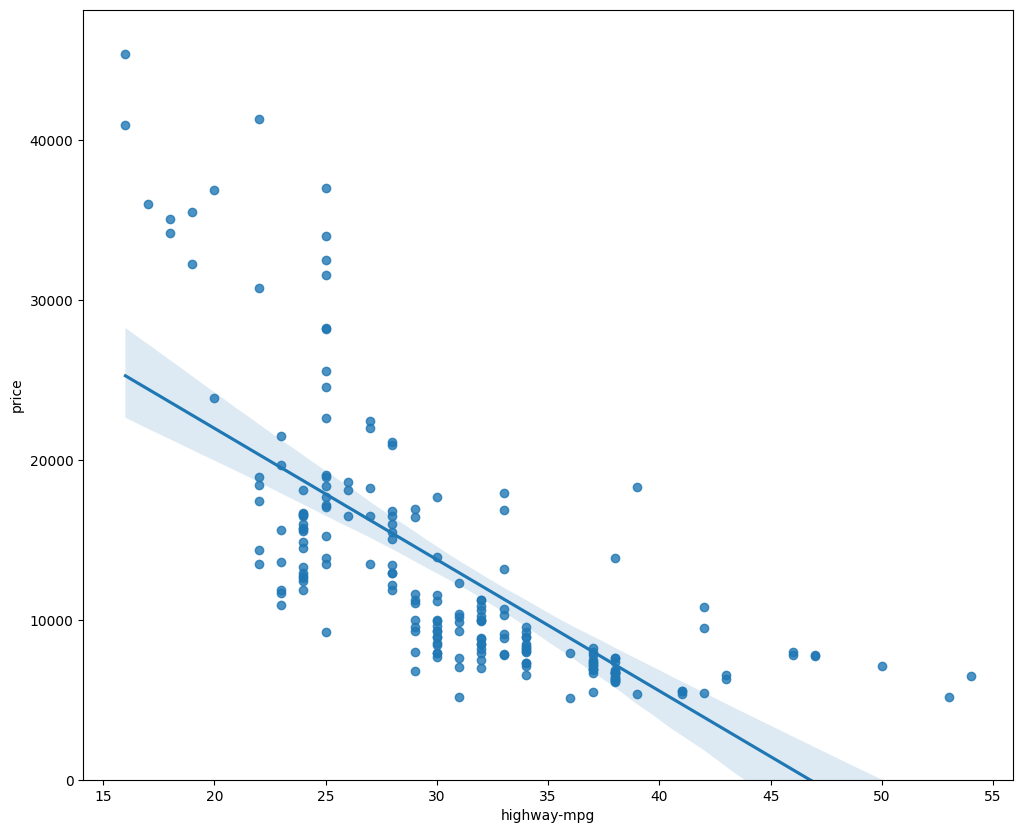

In [43]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".

(0.0, 47414.1)

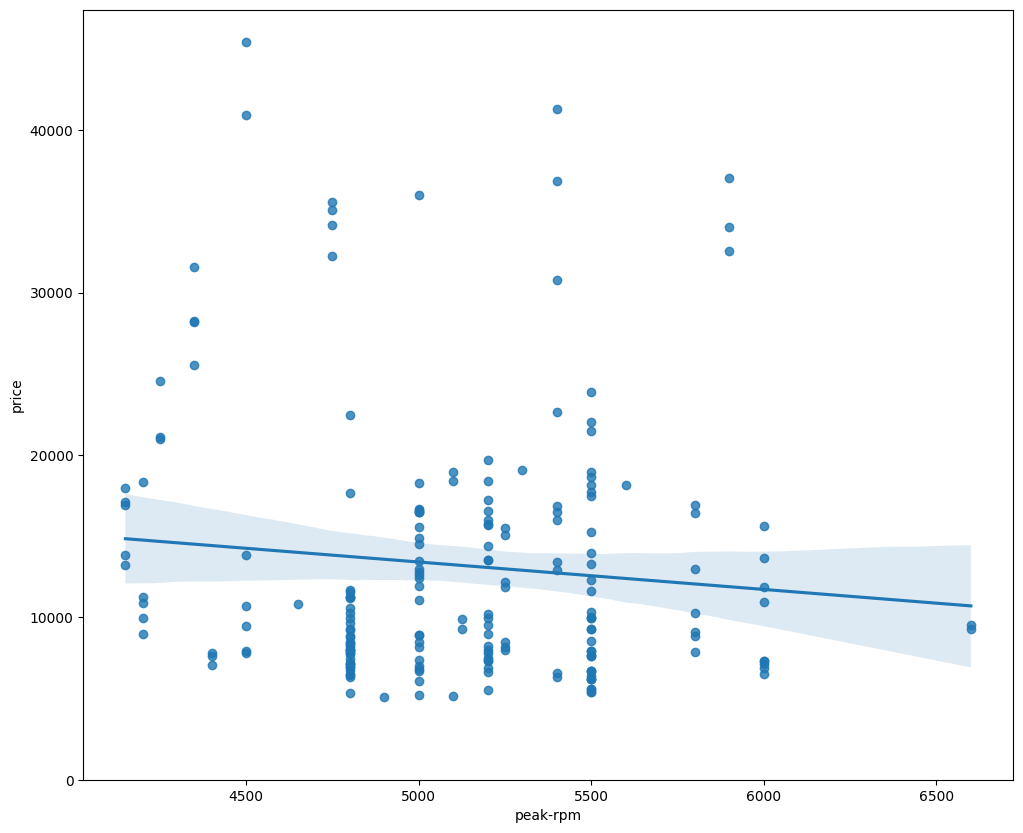

In [44]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

### Question #3:
Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.

In [45]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### **Residual Plot**

A good way to visualize the variance of the data is to use a residual plot.

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

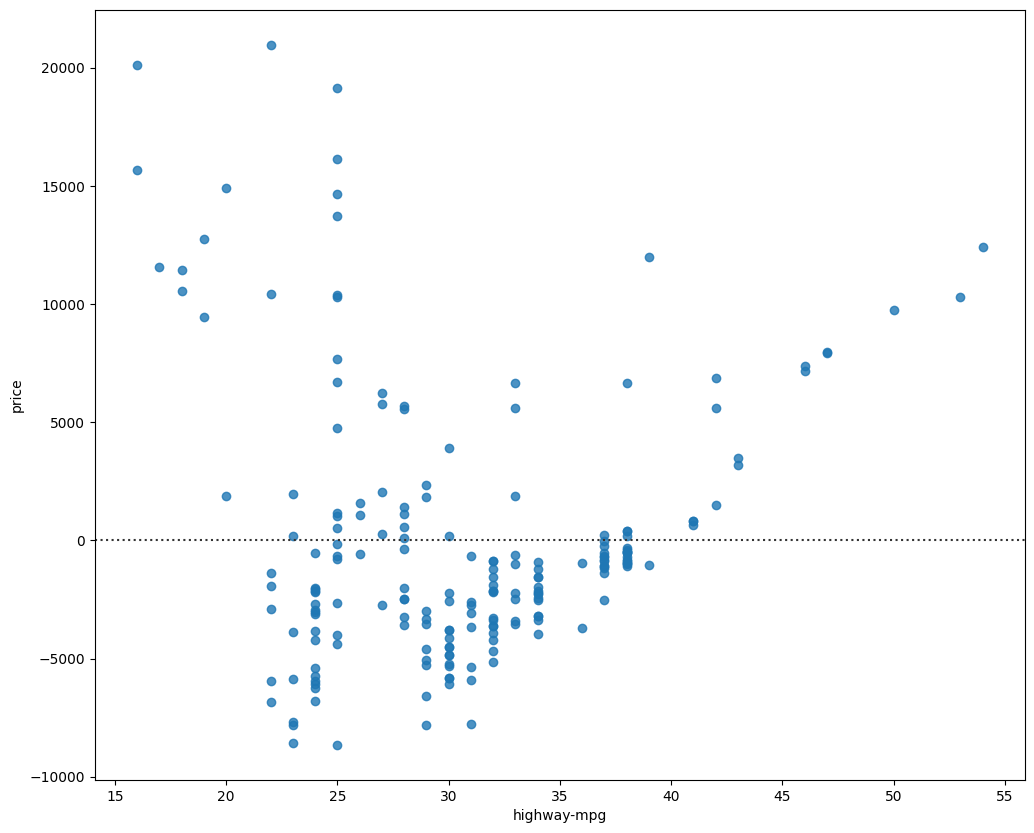

In [46]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

What is this plot telling us?

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

### **Multiple Linear Regression**
How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

First, let's make a prediction:

In [47]:
Y_hat = lm.predict(Z)

C:\Users\jayes\AppData\Local\Temp\ipykernel_7884\4196657742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\jayes\AppData\Local\Temp\ipykernel_7884\4196657742.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

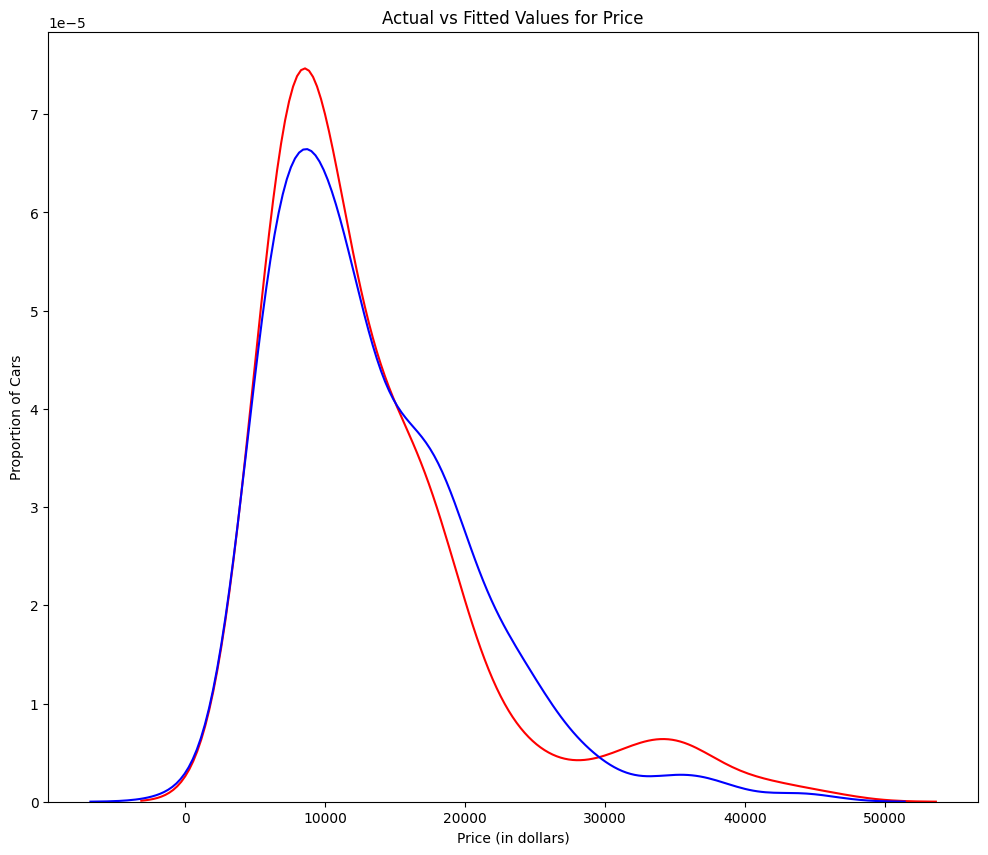

In [48]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

### **3. Polynomial Regression and Pipelines**
Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

There are different orders of polynomial regression:


Quadratic - 2nd Order
$$ Yhat = a + b_1 X +b_2 X^2 $$
Cubic - 3rd Order
$$ Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\ $$
Higher-Order:
$$ Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\ $$
We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

We will use the following function to plot the data:

In [50]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Let's get the variables:

In [51]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.

In [52]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Let's plot the function:

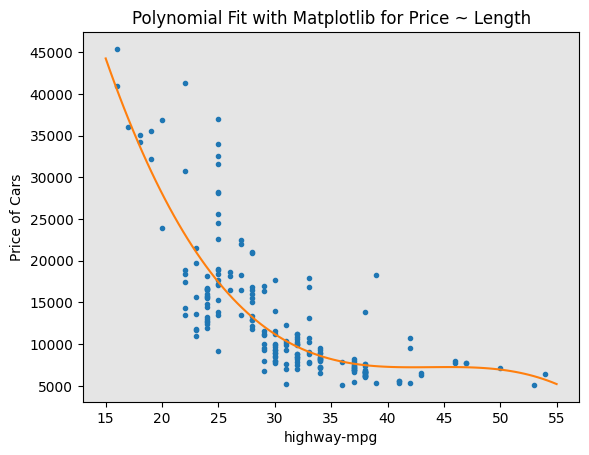

In [54]:
PlotPolly(p, x, y, 'highway-mpg')

In [55]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

# **.........INCOMPLETE...........**